# sklearn小例子

0. 导入数据
1. 线性回归
2. k近邻

在这个notebook中，我们将会使用sklearn包来做两个简单的机器学习模型。

In [1]:
import numpy as np  # 多维数组计算， sklearn主要使用的输入和输出数据格式
import pandas as pd # 表格数据处理，类似excel
import matplotlib.pyplot as plt  # 画图用的
import seaborn as sns # 画图用的

import sklearn  # scikit learn的包package名字
from sklearn.datasets import load_boston # 导入房价数据

### 导入数据集

sklearn自带了许多规模不大的数据集。其中，Iris（鸢尾花卉数据集）在它的网站文档里经常会被用作例子。

这里我们将会使用Boston房价数据集。

In [2]:
# 读取boston房价数据集
ds = load_boston()
ds.keys()

dict_keys(['target', 'DESCR', 'data', 'feature_names'])

Boston House Prices dataset
----

Notes
----
Data Set Characteristics:  

    Number of Instances: 506 

    Number of Attributes: 13 numeric/categorical predictive
    
    Median Value (attribute 14) is usually the target

    Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10000 usd
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000's usd

In [3]:
# RM 平均房间数量
# LSTAT 低收入人口百分比
# MEDV 房价中位数
boston = pd.DataFrame(ds.data, columns=ds.feature_names)
boston["MEDV"] = ds.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
prices = ds.target
rms = ds.data[:, 5]
lstats = ds.data[:, 12]

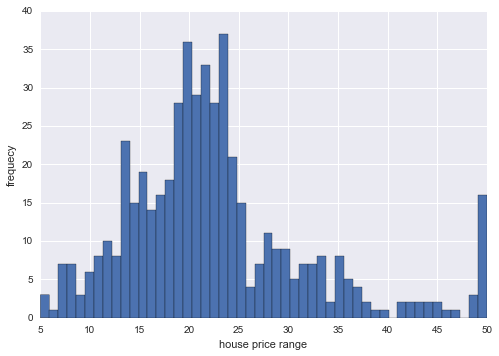

In [5]:
# 房价分布
plt.hist(prices, 50)
plt.xlabel("house price range")
plt.ylabel("frequecy")
plt.show()

### 各个特征之间的相关性。

关注最后一排和最后一列，是个其他特征和房价之间的关系。

RM 0.7， LSTAT -0.74.

最正相关和最负相关的两个特征。

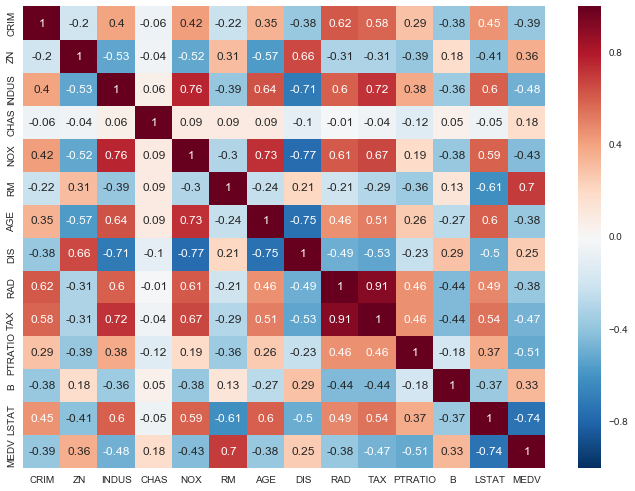

In [6]:
# 特征相关关系
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

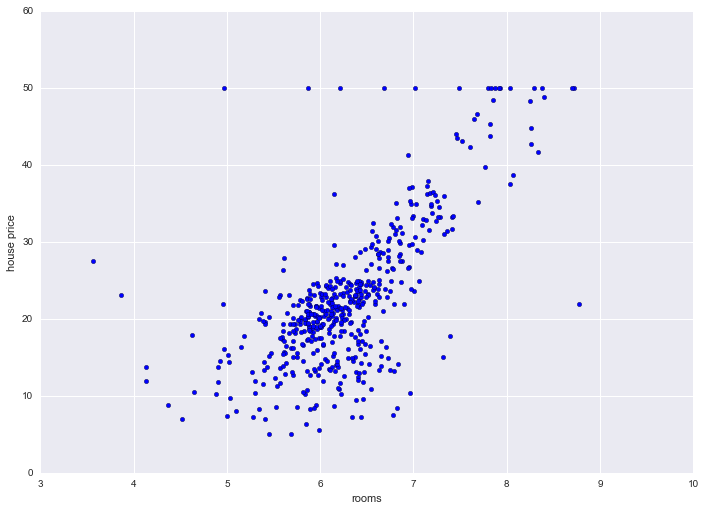

In [7]:
# RM 住宅的房间数 average number of rooms per dwelling
plt.scatter(rms, ds.target)
plt.xlabel("rooms")
plt.ylabel("house price")
plt.show()

### 线性回归

In [8]:
# sklearn linear regression
# 熟悉sklearn的api
from sklearn.linear_model import LinearRegression

# 初始化模型对象
lr_model = LinearRegression()

# 喂数据
X = rms.reshape((-1, 1))
print("X的前10条样例（房间数）")
print(X[:10, :])

y = ds.target
print("y的前10个（房价）")
print(y[:10])

lr_model.fit(X, y)

X的前10条样例（房间数）
[[ 6.575]
 [ 6.421]
 [ 7.185]
 [ 6.998]
 [ 7.147]
 [ 6.43 ]
 [ 6.012]
 [ 6.172]
 [ 5.631]
 [ 6.004]]
y的前10个（房价）
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# 模型参数
print("自变量系数, {}".format(lr_model.coef_))
print("常数项系数, {}".format(lr_model.intercept_))

自变量系数, [ 9.10210898]
常数项系数, -34.67062077643857


In [10]:
# 两点决定一条直线
min_x = X.min()
max_x = X.max()
xl = np.linspace(min_x, max_x, 2)
y_pred = lr_model.predict(xl.reshape((2, 1)))

xl, y_pred

(array([ 3.561,  8.78 ]), array([ -2.25801069,  45.24589608]))

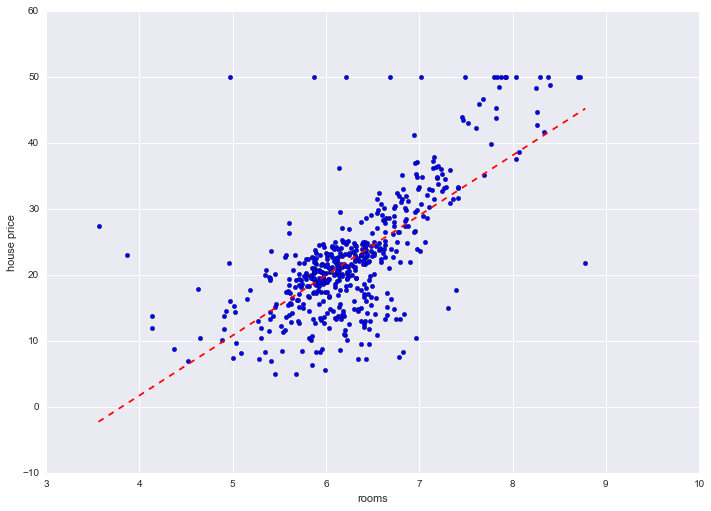

In [11]:
# 画图
plt.scatter(rms, ds.target)
plt.xlabel("rooms")
plt.ylabel("house price")
plt.plot(xl, y_pred, "--", c="red")
plt.show()


In [12]:
lr_score = lr_model.score(X, y)
lr_score

0.48352545599133429

### K近邻, k nearest neighbour

在k-NN回归中，输出是该对象的属性值。该值是其k个最近邻居的值的平均值。

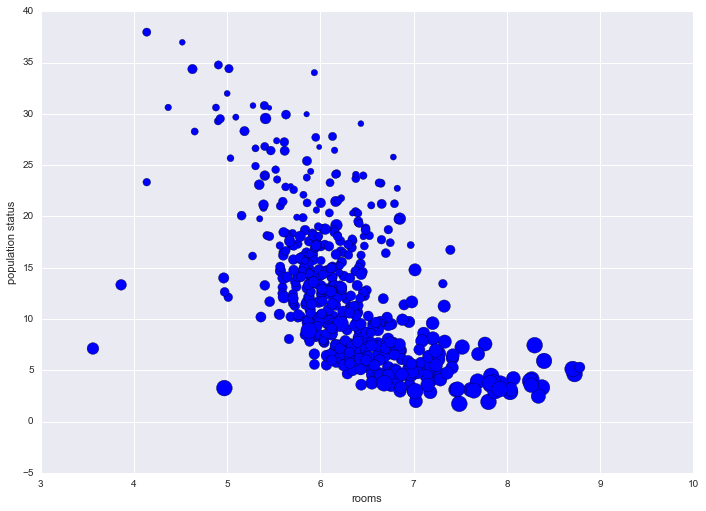

In [13]:
# LSTAT % lower status of population
plt.scatter(rms, lstats, s=prices*5)
plt.xlabel("rooms")
plt.ylabel("population status")
plt.show()

In [14]:
# 基于RM和LSTAT 的 K近邻居 
from sklearn.neighbors import KNeighborsRegressor

In [15]:
knr_model = KNeighborsRegressor(n_neighbors=10)

In [16]:
X = ds.data[:, [5, 12]]
y = ds.target
knr_model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [18]:
knr_model.predict([[4, 5.], [7, 20.]])

array([ 26.5 ,  14.29])

In [19]:
knr_score = knr_model.score(X, y)
knr_score

0.8091529070862844

## 参考链接

- [基于波士顿房价数据集的线性回归 Linear Regression on Boston Housing Dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)
- [scikit learn linear regression 文档](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [scikit learn knn regreesion 文档](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)